<a href="https://colab.research.google.com/github/wahyunh10/Project-Ecommerce-Shipping-Clasification-Modeling/blob/main/Stage_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

Import the csv file as panda DataFrames and examine it.

In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
df.shape

(10999, 12)

**Data Exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Observation
1. Data consists of 10999 rows
2. There is no data that is null or missing value
3. There doesn't seem to be a glaring issue with the data types for each column (it's appropriate)

In [5]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2154,2155,D,Ship,3,3,211,4,high,F,22,2942,1
4383,4384,B,Flight,3,3,150,2,medium,M,3,5836,0
455,456,F,Ship,4,1,149,3,medium,M,54,1178,1
4371,4372,B,Road,4,1,207,2,medium,M,4,4099,0
8728,8729,C,Ship,3,4,238,2,medium,M,7,5974,0


**Exploratory Data Analysis**

In [6]:
# grouping of columns by type
nums = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

In [7]:
df[nums].describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,3.567597,13.373216,210.196836,3634.016729,0.596691
std,1.141490,1.413603,1.522860,16.205527,48.063272,1635.377251,0.490584
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,169.000000,1839.500000,0.000000
50%,4.000000,3.000000,3.000000,7.000000,214.000000,4149.000000,1.000000
75%,5.000000,4.000000,4.000000,10.000000,251.000000,5050.000000,1.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000,1.000000


Some observations:

1. Coloumn `Customer_care_calls`, `customer_rating`, and `Prior_purchases` the distribution seems to be quite symmetrical (mean and median are not much different)
2. Coloumn `Discount_offered` and `Cost_of_the_Product`  seems to skew to the right (long-right tail)
3. Coloumn `Reached.on.Time_Y.N` boolean/binary value

In [8]:
df[cats].describe()

,Mode_of_Shipment,Product_importance,Gender,Warehouse_block
count,10999,10999,10999,10999
unique,3,3,2,5
top,Ship,low,F,F
freq,7462,5297,5545,3666


some observations:

 * For the category of **female gender** is more dominant,
 * For the important product category is dominated by the **low category**
 * For the shipping mode category is dominated by **shipping by ship**
 * For warehouse_block is dominated by **block F**
 * All unique values for each category are still in the normal category, **around 2-5 unique values**

In [9]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64

Value count kolom Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



# **UNIVARIATE ANALYSIS**

In [10]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

**Box plots**

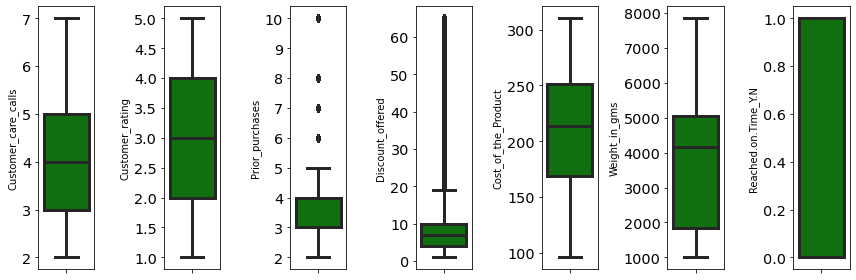

In [11]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

**Dist plots**

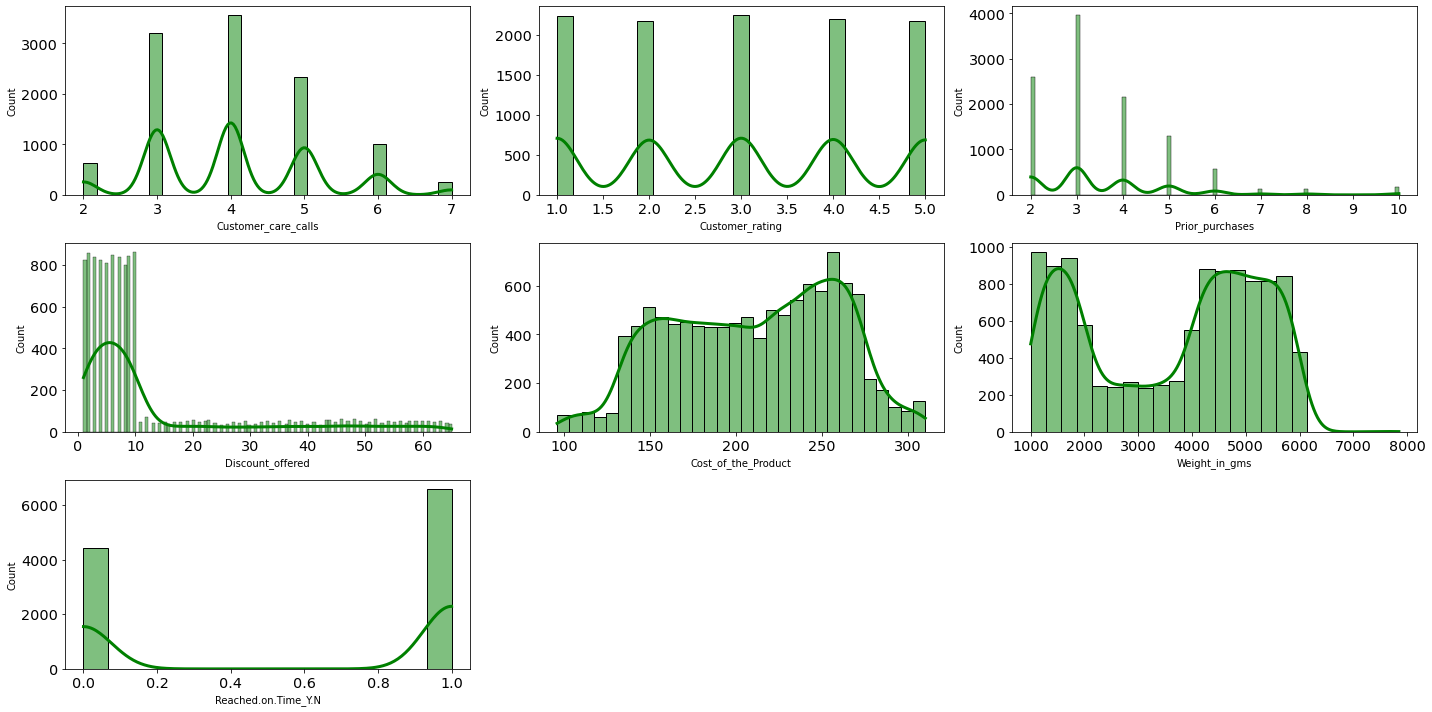

In [12]:
features = nums
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x=df[features[i]], kde=True, color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


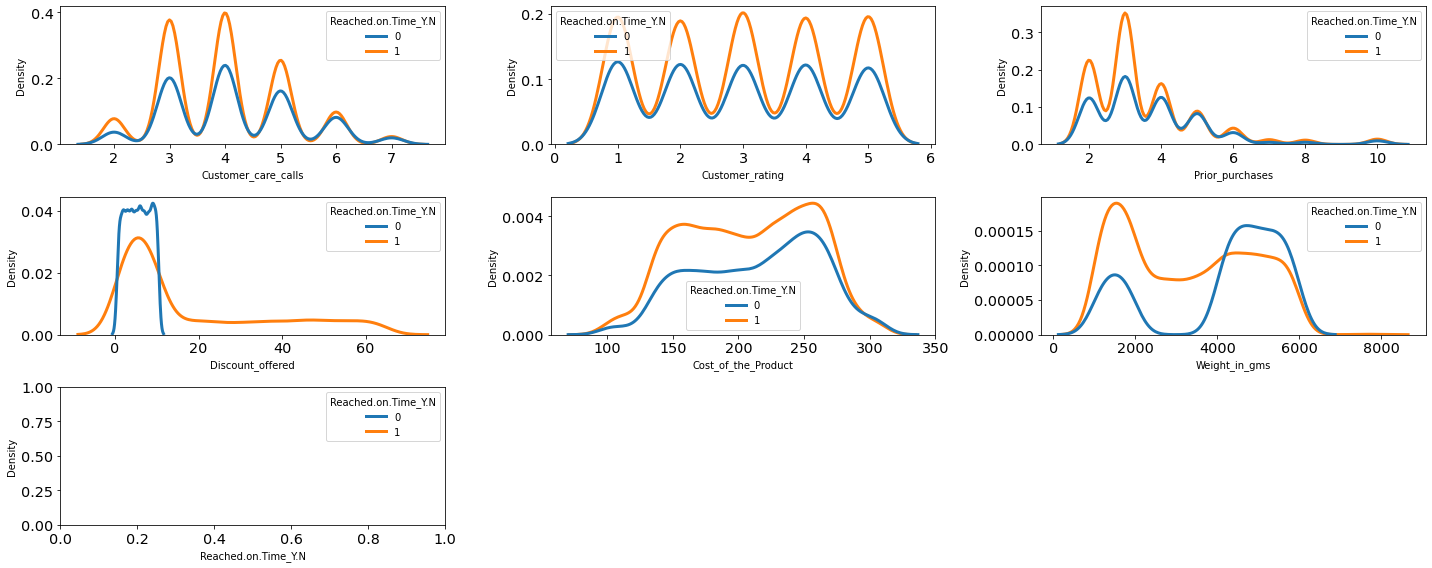

In [13]:
features = nums
plt.figure(figsize=(20,8))
for i in range(0, len(features)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.kdeplot(data=df, x=features[i], hue='Reached.on.Time_Y.N')
    #plt.xlabel(features[i])
    plt.tight_layout()

From the distribution plot it can be seen that:

* The `cost_of_the_product` column appears to be close to a normal distribution
* As we suspected when looking at the boxplot above, the `Prior_purchases`, and `Discount_offered` columns are slightly skewed. This means that there is a possibility that we will need to do something about these columns later.
* The `Reached.on.Time` columns are actually binary, so you don't need to pay too much attention to the shape of the distribution
* For the `weigh_in_gms` column there is an uncertainty of distribution because it is u-shape.
* For the column `customer_care_calls` and `customer_rating` evenly distributed

**Violin plots**

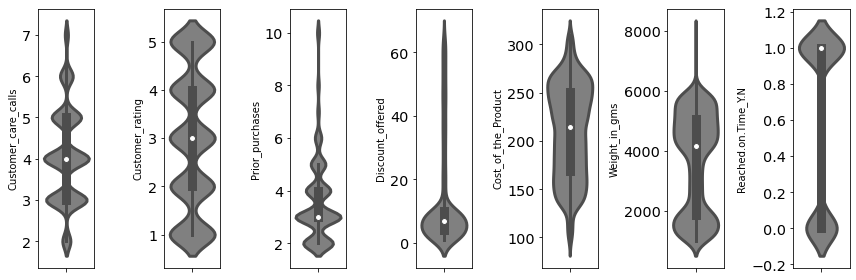

In [14]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

**Count plot(categorical)**

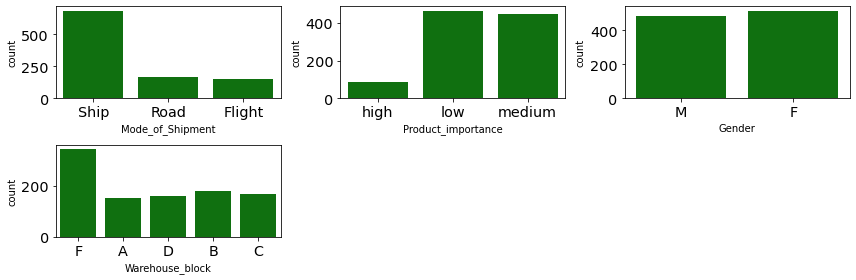

In [15]:
# categorical distribution
df_sample = df.sample(1000, random_state=42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color='green', orient='v')
    plt.tight_layout()

As we observed earlier, the distribution of low category (Product_importance), warehouse_block and Ship category (Mode_of_Shipment) is dominated by 1-2 values.

# **Bivariate Analysis**
**Correlation heatmap**

In [16]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [17]:
corr_df = df.corr()

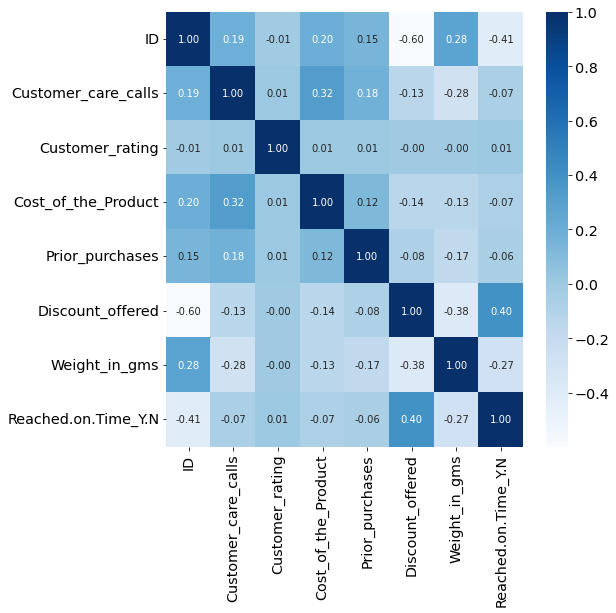

In [18]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

From the correlation heatmap above, it can be seen that:


*   Our target `Reached.on.Time_Y.N` has a weak positive correlation with `customer_rating`, `cost_of_the_product`, `customer_care_calls` and `prior_purchases`
*   It also has a fairly strong positive correlation with `Discount_offered`
*   It also has a fairly strong negative correlation with `weight_in_gms`



**Pair plot**

<Figure size 1080x1080 with 0 Axes>

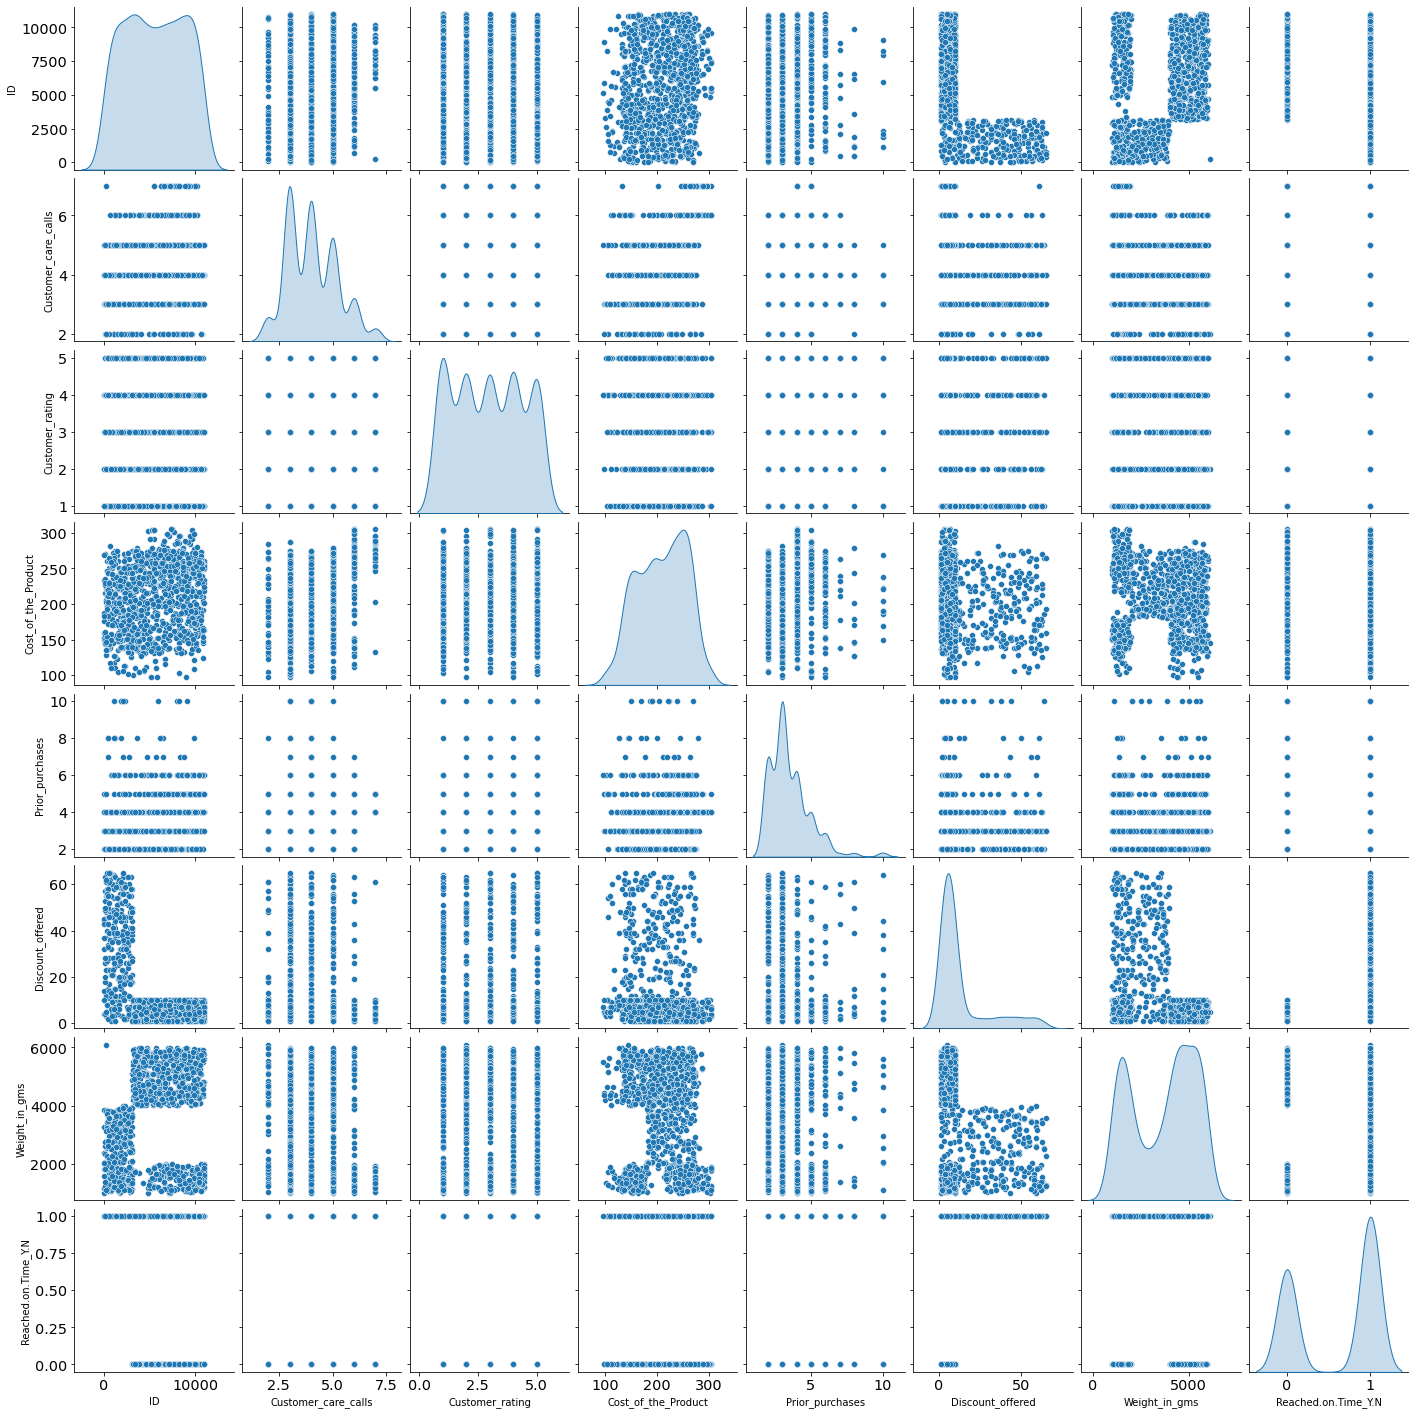

In [19]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde');

From the pair plot above, we can also see something similar: `Reached.on.time_YN` tends to be higher for low `Discount_offered`

# **Category columns VS Target Variable**

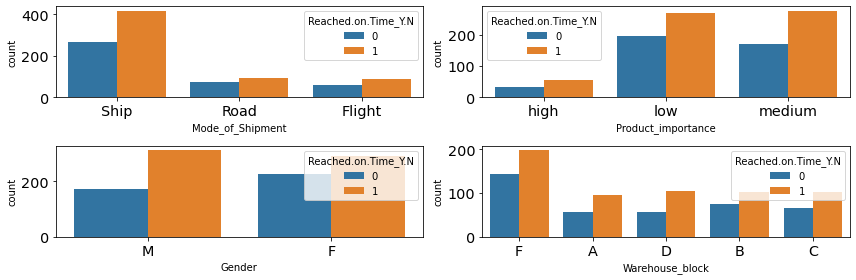

In [20]:
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data=df_sample, x=features[i], hue='Reached.on.Time_Y.N')
    #plt.xlabel(features[i])
    plt.tight_layout()

Observation

* shipment by ship tends to experience late delivery
* for `products_importance` with low and medium categories tend to experience late delivery
* for` warehouse_block` with category F tends to experience late delivery

**EDA Conclusion**

Some of the things we found from this EDA dataset are:

* The data looks valid and there are no major/significant defects
* There are some distributions that are slightly skewed, this must be remembered if we want to do something or use a model that requires the assumption of a normal distribution
* Some features have a clear correlation with the target, they will be used
* Some features look completely uncorrelated, they should be ignored
* From the categorical features, `mode_of_shipment` , `warehouse_block` and `product_importance` seem useful to be model predictors.

# **Insight and Visualization**

In [21]:
# 3 dari kolom kategorikal selain gender
# kolom diskon untuk visualisasi

In [22]:
df_group1 = df.groupby(['Reached.on.Time_Y.N','Mode_of_Shipment']).agg({'ID' : 'nunique'}).reset_index()
df_group1

,Reached.on.Time_Y.N,Mode_of_Shipment,ID
0,0,Flight,708
1,0,Road,725
2,0,Ship,3003
3,1,Flight,1069
4,1,Road,1035
5,1,Ship,4459


In [23]:
df_group2 = df.groupby('Reached.on.Time_Y.N').agg({'ID' : 'nunique'}).reset_index() 
df_group2

,Reached.on.Time_Y.N,ID
0,0,4436
1,1,6563


In [24]:
df_group3 = df_group1.merge(df_group2, on = 'Reached.on.Time_Y.N')
df_group3

,Reached.on.Time_Y.N,Mode_of_Shipment,ID_x,ID_y
0,0,Flight,708,4436
1,0,Road,725,4436
2,0,Ship,3003,4436
3,1,Flight,1069,6563
4,1,Road,1035,6563
5,1,Ship,4459,6563


In [25]:
df_group4 = df.groupby('Mode_of_Shipment').agg({'ID' : 'nunique'}).reset_index() 
df_group4

,Mode_of_Shipment,ID
0,Flight,1777
1,Road,1760
2,Ship,7462


In [26]:
df_group5 = df_group1.merge(df_group4, on = 'Mode_of_Shipment')
df_group5

,Reached.on.Time_Y.N,Mode_of_Shipment,ID_x,ID_y
0,0,Flight,708,1777
1,1,Flight,1069,1777
2,0,Road,725,1760
3,1,Road,1035,1760
4,0,Ship,3003,7462
5,1,Ship,4459,7462


In [27]:
df_group5['Ratio_Percentage(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100
df_group5.columns = ['Late', 'Mode Shipment', 'UniqueCustomer', 'TotalUnique', 'Ratio_Percentage(%)']
df_group5

,Late,Mode Shipment,UniqueCustomer,TotalUnique,Ratio_Percentage(%)
0,0,Flight,708,1777,39.842431
1,1,Flight,1069,1777,60.157569
2,0,Road,725,1760,41.193182
3,1,Road,1035,1760,58.806818
4,0,Ship,3003,7462,40.243902
5,1,Ship,4459,7462,59.756098


In [28]:
df_group3['Ratio_Percentage(%)'] = df_group3['ID_x'] / df_group3['ID_y'] * 100
df_group3.columns = ['Late', 'Mode Shipment', 'UniqueCustomer', 'TotalUnique', 'Ratio_Percentage(%)']
df_group3

,Late,Mode Shipment,UniqueCustomer,TotalUnique,Ratio_Percentage(%)
0,0,Flight,708,4436,15.960325
1,0,Road,725,4436,16.343553
2,0,Ship,3003,4436,67.696123
3,1,Flight,1069,6563,16.288283
4,1,Road,1035,6563,15.770227
5,1,Ship,4459,6563,67.941490


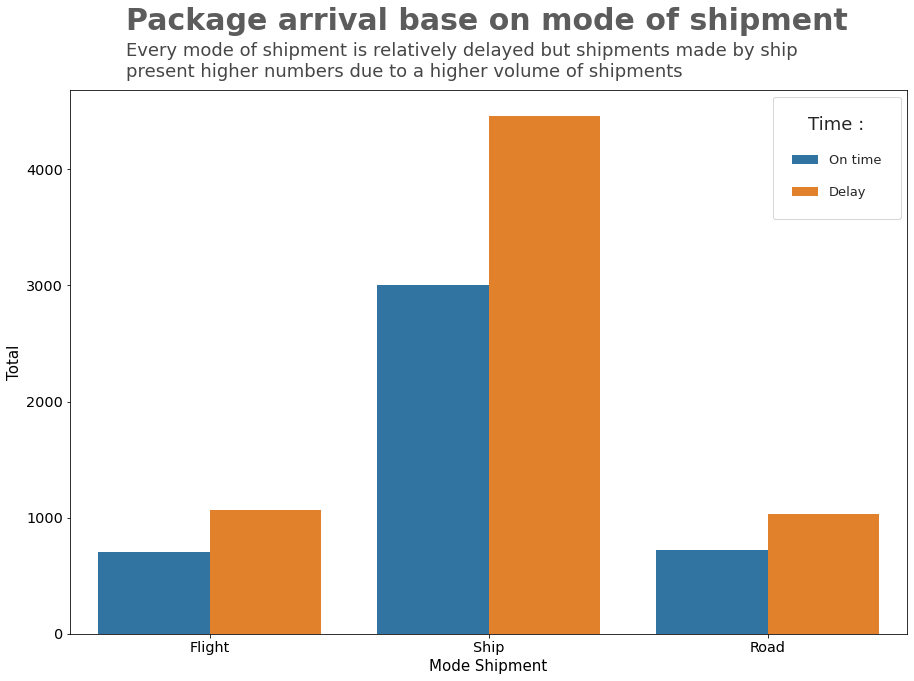

In [29]:
plt.figure(figsize=(15,10))
chart = sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N')
#chart = sns.barplot(x='Mode Shipment', y='Ratio_Percentage(%)', data=df_group3, hue='Late');

sns.set(font_scale= 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')

chart.set_xlabel("Mode Shipment", fontsize = 15)
chart.set_ylabel("Total", fontsize = 15)

plt.legend(loc='upper right', borderpad=1.5, labelspacing=1.5, fontsize=13, title='Time :', labels=['On time', 'Delay'])

# Adding a title and a subtitle
chart.text(x = -0.3, y = 5200, s = "Package arrival base on mode of shipment ",
               fontsize = 30, weight = 'bold', alpha = .75)
chart.text(x = -0.3, y = 4800,
               s = 'Every mode of shipment is relatively delayed but shipments made by ship \npresent higher numbers due to a higher volume of shipments',
              fontsize = 18, alpha = .85);

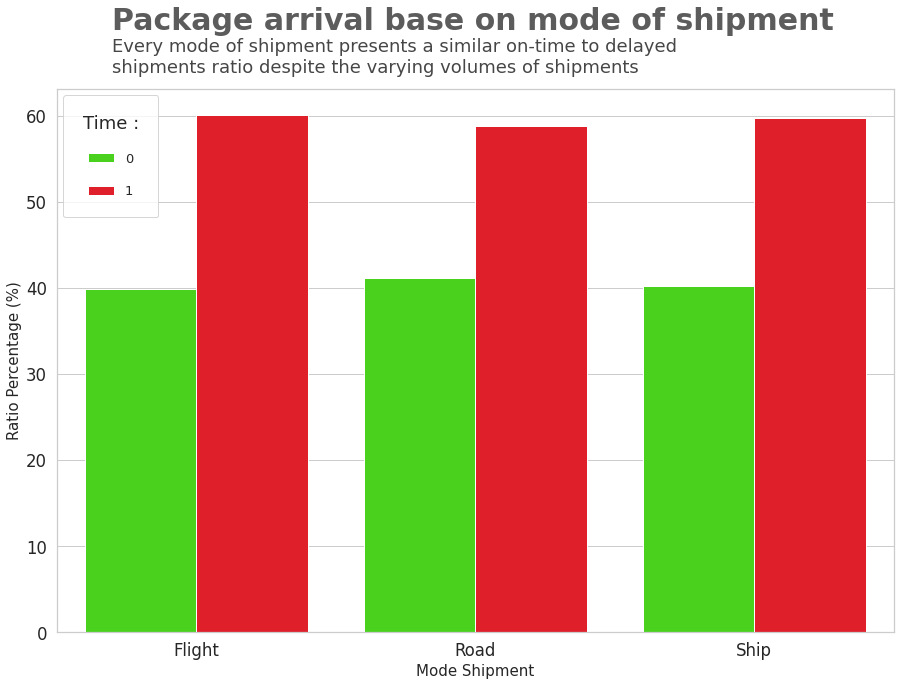

In [30]:
plt.figure(figsize=(15,10))
#chart = sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N')
chart = sns.barplot(x='Mode Shipment', y='Ratio_Percentage(%)', data=df_group5, hue='Late');

sns.set(font_scale= 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')

chart.set_xlabel("Mode Shipment", fontsize = 15)
chart.set_ylabel("Ratio Percentage (%)", fontsize = 15)

plt.legend(loc='upper left', borderpad=1.5, labelspacing=1.5, fontsize=13, title='Time :',)

# Adding a title and a subtitle
chart.text(x = -0.3, y = 70, s = "Package arrival base on mode of shipment ",
               fontsize = 30, weight = 'bold', alpha = .75)
chart.text(x = -0.3, y = 65,
               s = 'Every mode of shipment presents a similar on-time to delayed \nshipments ratio despite the varying volumes of shipments',
              fontsize = 18, alpha = .85);

In [31]:
df_group11 = df.groupby(['Reached.on.Time_Y.N','Product_importance']).agg({'ID' : 'nunique'}).reset_index()
df_group11

,Reached.on.Time_Y.N,Product_importance,ID
0,0,high,332
1,0,low,2157
2,0,medium,1947
3,1,high,616
4,1,low,3140
5,1,medium,2807


In [32]:
df_group12 = df.groupby('Reached.on.Time_Y.N').agg({'ID' : 'nunique'}).reset_index() 
df_group12

,Reached.on.Time_Y.N,ID
0,0,4436
1,1,6563


In [33]:
df_group13 = df_group11.merge(df_group12, on = 'Reached.on.Time_Y.N')
df_group13

,Reached.on.Time_Y.N,Product_importance,ID_x,ID_y
0,0,high,332,4436
1,0,low,2157,4436
2,0,medium,1947,4436
3,1,high,616,6563
4,1,low,3140,6563
5,1,medium,2807,6563


In [34]:
df_group14 = df.groupby('Product_importance').agg({'ID' : 'nunique'}).reset_index() 
df_group14

,Product_importance,ID
0,high,948
1,low,5297
2,medium,4754


In [35]:
df_group15 = df_group11.merge(df_group14, on = 'Product_importance')
df_group15

,Reached.on.Time_Y.N,Product_importance,ID_x,ID_y
0,0,high,332,948
1,1,high,616,948
2,0,low,2157,5297
3,1,low,3140,5297
4,0,medium,1947,4754
5,1,medium,2807,4754


In [36]:
df_group13['Ratio_Percentage(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Late', 'Product Importance', 'UniqueCustomer', 'TotalUnique', 'Ratio_Percentage(%)']
df_group13

,Late,Product Importance,UniqueCustomer,TotalUnique,Ratio_Percentage(%)
0,0,high,332,4436,7.484220
1,0,low,2157,4436,48.624887
2,0,medium,1947,4436,43.890893
3,1,high,616,6563,9.385952
4,1,low,3140,6563,47.843974
5,1,medium,2807,6563,42.770075


In [37]:
df_group15['Ratio_Percentage(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Late', 'Product Importance', 'UniqueCustomer', 'TotalUnique', 'Ratio_Percentage(%)']
df_group15

,Late,Product Importance,UniqueCustomer,TotalUnique,Ratio_Percentage(%)
0,0,high,332,948,35.021097
1,1,high,616,948,64.978903
2,0,low,2157,5297,40.721163
3,1,low,3140,5297,59.278837
4,0,medium,1947,4754,40.954985
5,1,medium,2807,4754,59.045015


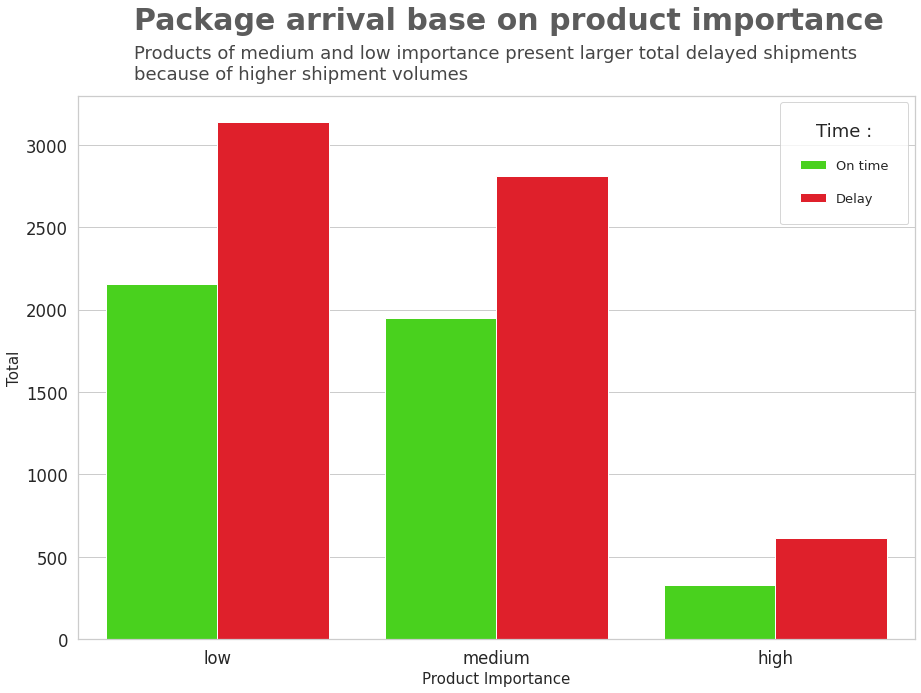

In [38]:
plt.figure(figsize=(15,10))
chart = sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N')
#sns.barplot(x='PaymentMethod', y='Ratio_Percentage(%)', data=df, hue='Reached.on.Time_Y.N');

sns.set(font_scale= 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')

chart.set_xlabel("Product Importance", fontsize = 15)
chart.set_ylabel("Total", fontsize = 15)

plt.legend(loc='upper right', borderpad=1.5, labelspacing=1.5, fontsize=13, title='Time :', labels=['On time', 'Delay'])

# Adding a title and a subtitle
chart.text(x = -0.3, y = 3700, s = "Package arrival base on product importance",
               fontsize = 30, weight = 'bold', alpha = .75)
chart.text(x = -0.3, y = 3400,
               s = 'Products of medium and low importance present larger total delayed shipments \nbecause of higher shipment volumes',
              fontsize = 18, alpha = .85);

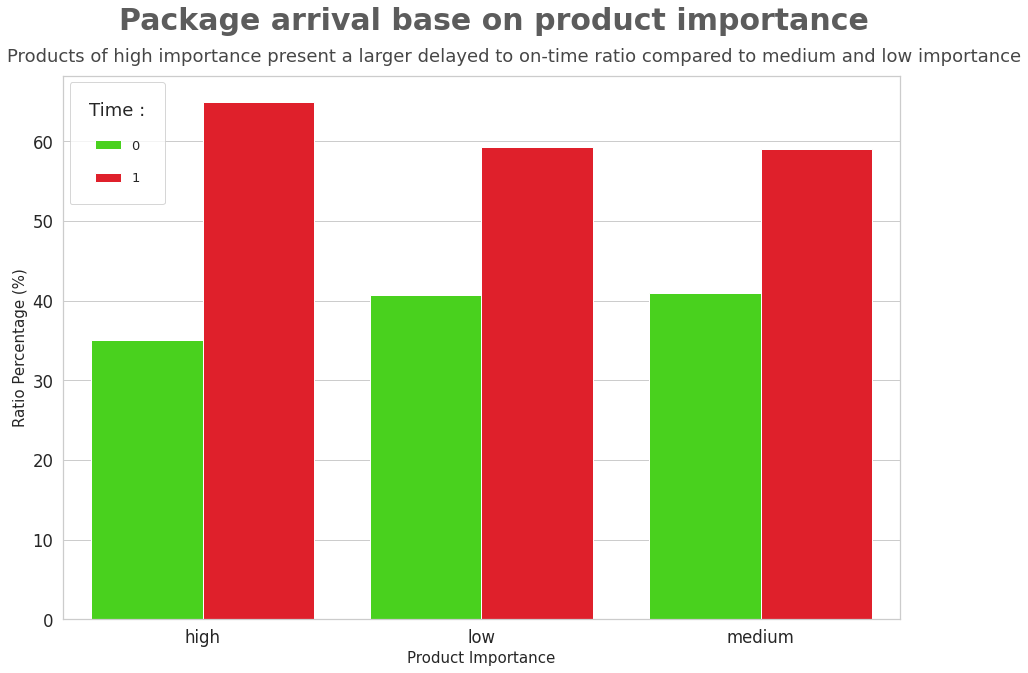

In [39]:
plt.figure(figsize=(15,10))
#chart = sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N')
chart = sns.barplot(x='Product Importance', y='Ratio_Percentage(%)', data=df_group15, hue='Late');

sns.set(font_scale= 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')

chart.set_xlabel("Product Importance", fontsize = 15)
chart.set_ylabel("Ratio Percentage (%)", fontsize = 15)

plt.legend(loc='upper left', borderpad=1.5, labelspacing=1.5, fontsize=13, title='Time :',)

# Adding a title and a subtitle
chart.text(x = -0.3, y = 74, s = "Package arrival base on product importance ",
               fontsize = 30, weight = 'bold', alpha = .75)
chart.text(x = -0.7, y = 70,
               s = 'Products of high importance present a larger delayed to on-time ratio compared to medium and low importance',
              fontsize = 18, alpha = .85);

In [40]:
df_group21 = df.groupby(['Reached.on.Time_Y.N','Warehouse_block']).agg({'ID' : 'nunique'}).reset_index()
df_group21

,Reached.on.Time_Y.N,Warehouse_block,ID
0,0,A,758
1,0,B,729
2,0,C,739
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [41]:
df_group22 = df.groupby('Reached.on.Time_Y.N').agg({'ID' : 'nunique'}).reset_index() 
df_group22

,Reached.on.Time_Y.N,ID
0,0,4436
1,1,6563


In [42]:
df_group23 = df_group21.merge(df_group22, on = 'Reached.on.Time_Y.N')
df_group23

,Reached.on.Time_Y.N,Warehouse_block,ID_x,ID_y
0,0,A,758,4436
1,0,B,729,4436
2,0,C,739,4436
3,0,D,738,4436
4,0,F,1472,4436
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [43]:
df_group23['Ratio_Percentage(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['Late', 'Warehouse Block', 'UniqueCustomer', 'TotalUnique', 'Ratio_Percentage(%)']
df_group23

,Late,Warehouse Block,UniqueCustomer,TotalUnique,Ratio_Percentage(%)
0,0,A,758,4436,17.087466
1,0,B,729,4436,16.433724
2,0,C,739,4436,16.659152
3,0,D,738,4436,16.636610
4,0,F,1472,4436,33.183048
5,1,A,1075,6563,16.379704
6,1,B,1104,6563,16.821575
7,1,C,1094,6563,16.669206
8,1,D,1096,6563,16.699680
9,1,F,2194,6563,33.429834


In [44]:
df_group24 = df.groupby('Warehouse_block').agg({'ID' : 'nunique'}).reset_index() 
df_group24

,Warehouse_block,ID
0,A,1833
1,B,1833
2,C,1833
3,D,1834
4,F,3666


In [45]:
df_group25 = df_group21.merge(df_group24, on = 'Warehouse_block')
df_group25

,Reached.on.Time_Y.N,Warehouse_block,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,739,1833
5,1,C,1094,1833
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [46]:
df_group25['Ratio_Percentage(%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['Late', 'Warehouse Block', 'UniqueCustomer', 'TotalUnique', 'Ratio_Percentage(%)']
df_group25

,Late,Warehouse Block,UniqueCustomer,TotalUnique,Ratio_Percentage(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,739,1833,40.316421
5,1,C,1094,1833,59.683579
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


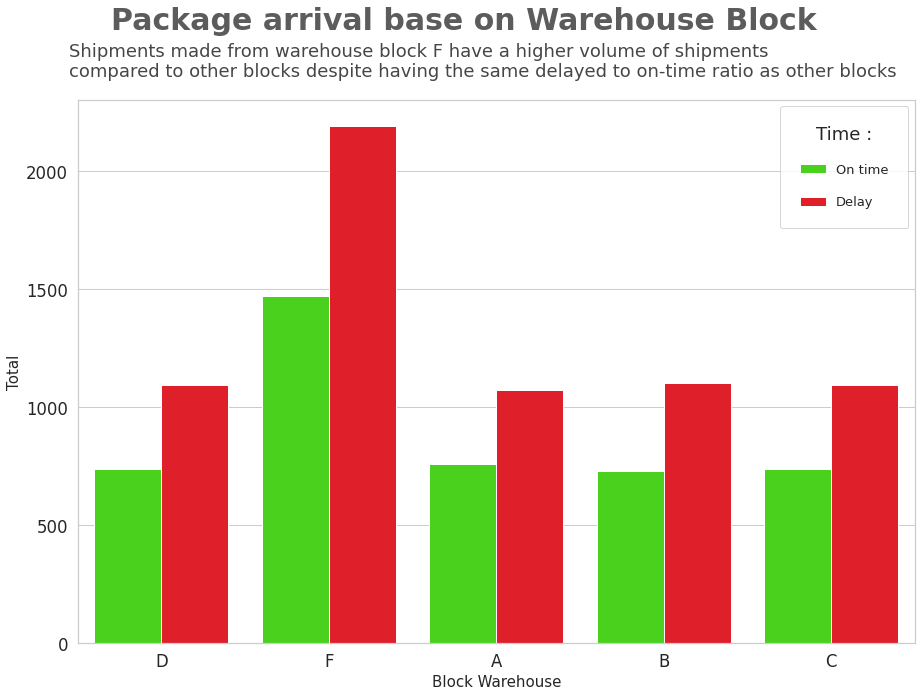

In [47]:
plt.figure(figsize=(15,10))
chart = sns.countplot(data=df, x='Warehouse_block', hue='Reached.on.Time_Y.N')
#sns.barplot(x='PaymentMethod', y='Ratio_Percentage(%)', data=df, hue='Reached.on.Time_Y.N');

sns.set(font_scale= 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')

chart.set_xlabel("Block Warehouse", fontsize = 15)
chart.set_ylabel("Total", fontsize = 15)

plt.legend(loc='upper right', borderpad=1.5, labelspacing=1.5, fontsize=13, title='Time :', labels=['On time', 'Delay'])

# Adding a title and a subtitle
chart.text(x = -0.3, y = 2600, s = "Package arrival base on Warehouse Block ",
               fontsize = 30, weight = 'bold', alpha = .75)
chart.text(x = -0.55, y = 2400,
               s = 'Shipments made from warehouse block F have a higher volume of shipments \ncompared to other blocks despite having the same delayed to on-time ratio as other blocks',
              fontsize = 18, alpha = .85);

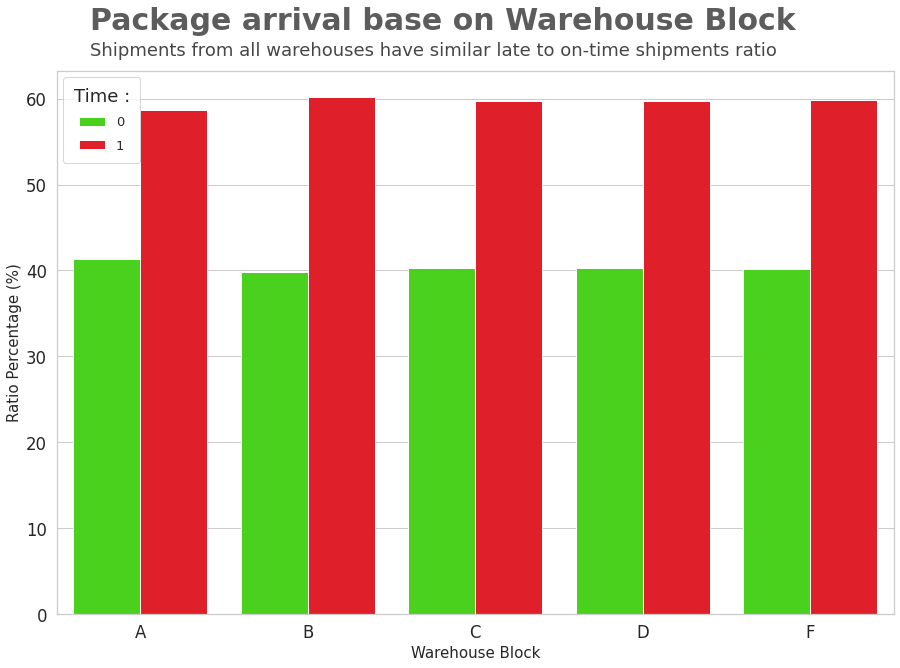

In [48]:
plt.figure(figsize=(15,10))
#chart = sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N')
chart = sns.barplot(x='Warehouse Block', y='Ratio_Percentage(%)', data=df_group25, hue='Late');

sns.set(font_scale= 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')

chart.set_xlabel("Warehouse Block", fontsize = 15)
chart.set_ylabel("Ratio Percentage (%)", fontsize = 15)

plt.legend(loc='upper left', borderpad=0.8, labelspacing=0.8, fontsize=13, title='Time :',)

# Adding a title and a subtitle
chart.text(x = -0.3, y = 68, s = "Package arrival base on Warehouse Block",
               fontsize = 30, weight = 'bold', alpha = .75)
chart.text(x = -0.3, y = 65,
               s = 'Shipments from all warehouses have similar late to on-time shipments ratio',
              fontsize = 18, alpha = .85);

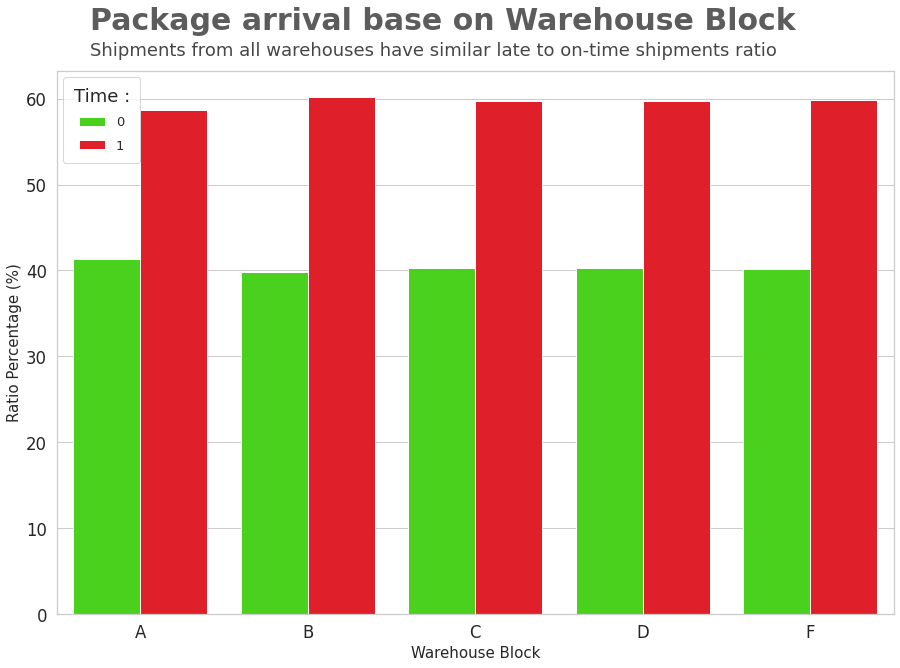

In [49]:
plt.figure(figsize=(15,10))
#chart = sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N')
chart = sns.barplot(x='Warehouse Block', y='Ratio_Percentage(%)', data=df_group25, hue='Late');

sns.set(font_scale= 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')

chart.set_xlabel("Warehouse Block", fontsize = 15)
chart.set_ylabel("Ratio Percentage (%)", fontsize = 15)

plt.legend(loc='upper left', borderpad=0.8, labelspacing=0.8, fontsize=13, title='Time :',)

# Adding a title and a subtitle
chart.text(x = -0.3, y = 68, s = "Package arrival base on Warehouse Block",
               fontsize = 30, weight = 'bold', alpha = .75)
chart.text(x = -0.3, y = 65,
               s = 'Shipments from all warehouses have similar late to on-time shipments ratio',
              fontsize = 18, alpha = .85);